In [1]:
import csv
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import pickle

## Ann

In [2]:
# file = open('processed_features', 'rb')
# X_train, Y_train, X_test, Y_test, X_val, Y_val = pickle.load(file)
# file.close()

file = open('data_pickles/processed_features_plus', 'rb')
X_train, Y_train, X_test, Y_test, X_val, Y_val = pickle.load(file)
file.close()

# file = open('processed_features_window_2', 'rb')
# X_train, Y_train, X_test, Y_test, X_val, Y_val = pickle.load(file)
# file.close()

# file = open('processed_features_window_3', 'rb')
# X_train, Y_train, X_test, Y_test, X_val, Y_val = pickle.load(file)
# file.close()

In [3]:
X_train.shape, X_train[1], Y_train.shape

((870, 13),
 array([0.44308452, 0.34832337, 0.1956427 , 0.53335732, 0.61453386,
        0.18496241, 0.24151003, 0.47051729, 0.63403149, 0.48049792,
        0.5156211 , 0.11363636, 0.5       ]),
 (870,))

In [4]:
reshape_form = X_train.shape[1]

X_train = X_train.reshape(len(X_train), reshape_form)
X_test = X_test.reshape(len(X_test), reshape_form)
X_val = X_val.reshape(len(X_val), reshape_form)

In [5]:
visible = Input(shape=(13, ))
hidden1 = Dense(16, activation='relu')(visible)
# drop1 = Dropout(0.25)(hidden1)
hidden2 = Dense(8, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', patience=10)

In [7]:
history = model.fit(X_train, Y_train,
                    # batch_size=100,
                    epochs=50,
                    verbose=2,
                    validation_data=(X_val, Y_val),
                    callbacks=[callback])

Epoch 1/50
28/28 - 1s - loss: 0.6870 - accuracy: 0.5977 - val_loss: 0.6713 - val_accuracy: 0.6452 - 1s/epoch - 43ms/step
Epoch 2/50
28/28 - 0s - loss: 0.6548 - accuracy: 0.7011 - val_loss: 0.6417 - val_accuracy: 0.7151 - 112ms/epoch - 4ms/step
Epoch 3/50
28/28 - 0s - loss: 0.6307 - accuracy: 0.7552 - val_loss: 0.6182 - val_accuracy: 0.7366 - 117ms/epoch - 4ms/step
Epoch 4/50
28/28 - 0s - loss: 0.6091 - accuracy: 0.7586 - val_loss: 0.5954 - val_accuracy: 0.7151 - 109ms/epoch - 4ms/step
Epoch 5/50
28/28 - 0s - loss: 0.5867 - accuracy: 0.7805 - val_loss: 0.5726 - val_accuracy: 0.7849 - 113ms/epoch - 4ms/step
Epoch 6/50
28/28 - 0s - loss: 0.5647 - accuracy: 0.7908 - val_loss: 0.5513 - val_accuracy: 0.7527 - 102ms/epoch - 4ms/step
Epoch 7/50
28/28 - 0s - loss: 0.5414 - accuracy: 0.8034 - val_loss: 0.5261 - val_accuracy: 0.7849 - 112ms/epoch - 4ms/step
Epoch 8/50
28/28 - 0s - loss: 0.5202 - accuracy: 0.8046 - val_loss: 0.5051 - val_accuracy: 0.7796 - 112ms/epoch - 4ms/step
Epoch 9/50
28/28 -

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Evaluation loss:', score[0])
print('Evaluation accuracy:', score[1])

Evaluation loss: 0.3364165723323822
Evaluation accuracy: 0.8526315689086914


## XGBoost

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import graphviz

In [10]:
file = open('data_pickles/processed_features_plus', 'rb')
X_train, Y_train, X_test, Y_test, X_val, Y_val = pickle.load(file)
file.close()

In [11]:
boost = xgb.XGBClassifier (objective="binary:logistic", learning_rate = 0.02, booster="gbtree")
boost.fit (X_train, Y_train)

# boost.predict(X_test)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
pred = boost.predict(X_val)
sci_pred = [round(value) for value in pred]

acc = accuracy_score (Y_val, sci_pred)
error = mean_squared_error (Y_val, sci_pred)
cm = confusion_matrix(Y_val, sci_pred)

print(f'Acc: {acc}')
print(f'Error: {error}')
print(f'Confusion Matrix: {cm}')

Acc: 0.8387096774193549
Error: 0.16129032258064516
Confusion Matrix: [[78 15]
 [15 78]]


In [13]:
pred = boost.predict(X_test)
sci_pred = [round(value) for value in pred]

acc = accuracy_score (Y_test, sci_pred)
error = mean_squared_error (Y_test, sci_pred)
cm = confusion_matrix(Y_test, sci_pred)

print(f'Acc: {acc}')
print(f'Error: {error}')
print(f'Confusion Matrix: {cm}')


Acc: 0.8263157894736842
Error: 0.1736842105263158
Confusion Matrix: [[81 14]
 [19 76]]


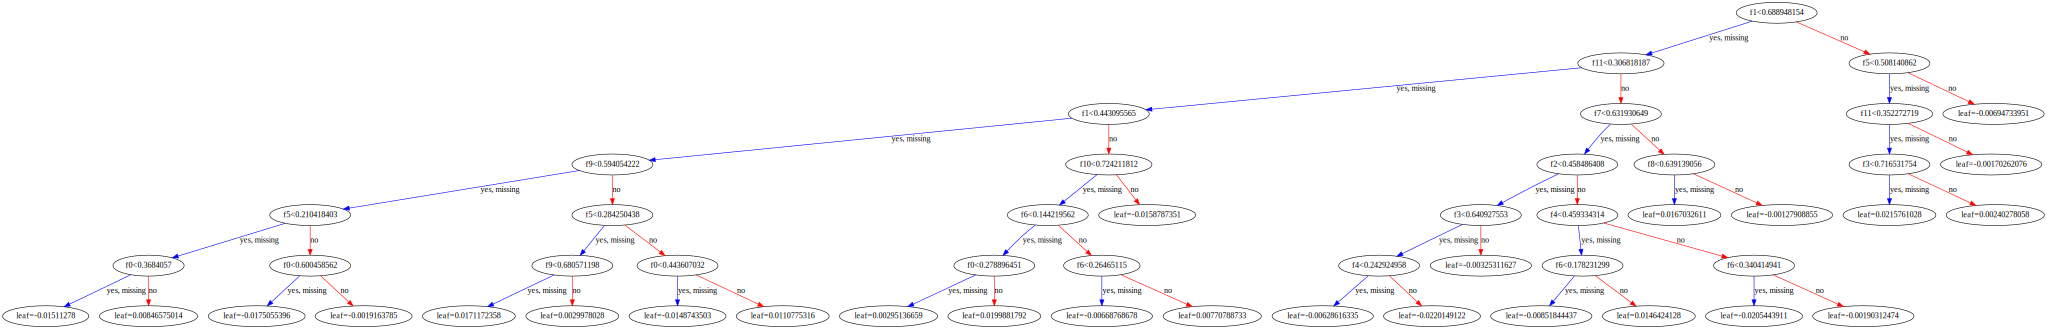

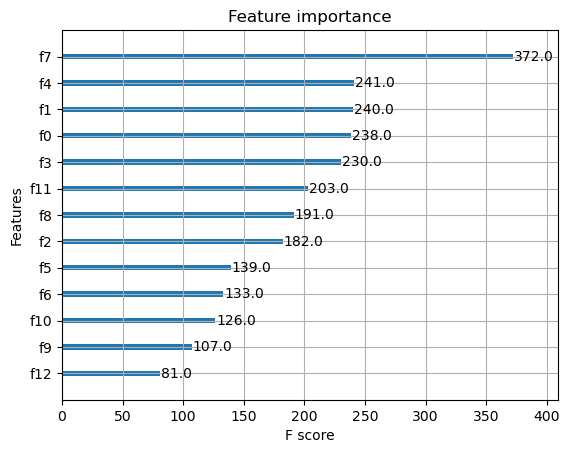

In [16]:
xgb.plot_importance(boost)
xgb.to_graphviz(boost, num_trees=boost.best_iteration)